<a href="https://colab.research.google.com/github/p3dr0id/covid19oesteba/blob/main/dados_vacinas_municipios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programa para preencher a aba "vacinas" da planilha de dados do Dashboard

## Importando as bibliotecas necessárias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from google.colab import drive, auth
drive.mount('drive', force_remount=True) # Monta meu google drive para salvar os dataframes e figuras
!pip install gspread_pandas==3.0.0 

Mounted at drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gspread
    Found existing installation: gspread 3.4.2
    Uninstalling gspread-3.4.2:
      Successfully uninstalled gspread-3.4.2


## Carregando a base de dados

In [ ]:
uploaded = files.upload()

Saving Consolidado Campanha Covid 03.06.2022.xlsx to Consolidado Campanha Covid 03.06.2022.xlsx


In [ ]:
df_vacina = pd.read_excel(list(uploaded.keys())[0])
df_vacina

,Cód. IBGE,Núcleo Regional de Saúde (NRS),Município,Crianças Indígenas 5 a 11 anos - D1,Crianças Quilombolas 5 a 11 anos - D1,Crianças com deficiência permanente 5 a 11 anos - D1,Crianças com comorbidades 5 a 11 anos - D1,Crianças sem comorbidades 5 a 11 anos - D1,Total Doses Pediátricas Aplicadas - D1,Adolescentes 12 a 17 anos - D1,...,Total de Doses Aplicadas - D4,Pessoas 18 a 19 anos - DU,Pessoas 20 a 29 anos - DU,Pessoas 30 a 39 anos - DU,Pessoas 40 a 49 anos - DU,Pessoas 50 a 59 anos - DU,Idosos 60 a 69 anos - DU,Idosos 70 a 79 anos - DU,Idosos 80 anos + - DU,Total de Doses Aplicadas - DU
0,290010.0,Centro-Leste,Abaíra,0,0,0,0,416,416,626,...,583,1,13,24,1,0,0,0,0,39
1,290020.0,Norte,Abaré,150,9,14,13,1811,1997,2064,...,48,4,3,118,101,5,3,2,1,237
2,290030.0,Nordeste,Acajutiba,0,0,0,0,1192,1192,1395,...,0,0,0,34,136,0,0,0,0,170
3,290035.0,Nordeste,Adustina,0,0,0,7,1172,1179,1357,...,18,0,3,164,32,3,0,1,0,203
4,290040.0,Centro-Leste,Água Fria,0,0,2,2,1089,1093,1275,...,264,0,2,93,83,20,1,0,1,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,293340.0,Centro-Leste,Wagner,0,6,6,9,615,636,716,...,83,0,3,34,67,4,2,0,0,110
414,293345.0,Oeste,Wanderley,0,0,0,19,685,704,1091,...,89,1,32,88,23,10,1,1,0,156
415,293350.0,Sul,Wenceslau Guimarães,0,0,5,4,1345,1354,3112,...,5,3,27,114,52,23,2,4,0,225
416,293360.0,Centro-norte,Xique-Xique,0,150,0,7,3890,4047,4902,...,300,0,0,260,179,80,4,2,0,525


In [ ]:
df_vacina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 58 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Cód. IBGE                                             417 non-null    float64
 1   Núcleo Regional de Saúde (NRS)                        418 non-null    object 
 2   Município                                             418 non-null    object 
 3   Crianças Indígenas 5 a 11 anos - D1                   418 non-null    int64  
 4   Crianças Quilombolas 5 a 11 anos - D1                 418 non-null    int64  
 5   Crianças com deficiência permanente 5 a 11 anos - D1  418 non-null    int64  
 6   Crianças com comorbidades 5 a 11 anos - D1            418 non-null    int64  
 7   Crianças sem comorbidades 5 a 11 anos - D1            418 non-null    int64  
 8   Total Doses Pediátricas Aplicadas - D1                418 no

## Pré-processamento dos dados

### Filtrando do dataframe os dados referentes aos 36 municípios da macrorregião Oeste

In [ ]:
#populacao = pd.Series([13977, 13877, 155439, 10557, 3577, 13782, 13910, 25591, 87519, 13643, 22339, 28338, 
#                       33742, 12518, 12238, 69148, 9711, 18777, 14194, 32137, 8385, 39845, 26614, 15391, 18320, 
#                       31472, 13012, 53578, 10231, 21174, 26927, 9865, 8519, 11348, 21825, 32000])
#populacao_alvo_censo_2010 = pd.Series([13036, 12640, 125667, 10224, 2413, 12559, 12289, 20420, 54026, 11547, 20097, 24020, 
#                       25062, 10477, 11421, 57782, 8578, 16716, 13285, 28872, 8378, 37178, 22862, 11895, 16738, 
#                        28783, 10857, 44609, 9930, 17929, 23361, 8655, 7667, 9180, 20316, 26915])

#População alvo DIVEP 2022
populacao_alvo = pd.Series([13521, 13127, 144760, 10400, 3434, 13309, 13510, 23924, 78106, 13045, 21588, 27224, 
                       31390, 11875, 11735, 64906, 9307, 17970, 13845, 30983, 8344, 38602, 25565, 14292, 16874, 
                        30239, 12123, 50654, 9895, 20448, 25598, 9516, 8215, 10498, 21531, 30737])
municipios_por_micro =['Angical', 'Baianópolis', 'Barreiras', 'Brejolândia', 'Catolândia',
                      'Cotegipe', 'Cristópolis', 'Formosa do Rio Preto',
                      'Luís Eduardo Magalhães', 'Mansidão', 'Riachão das Neves',
                      'Santa Rita de Cássia', 'São Desidério', 'Tabocas do Brejo Velho',
                      'Wanderley', 'Bom Jesus da Lapa', 'Canápolis', 'Cocos', 'Coribe',
                      'Correntina', 'Jaborandi', 'Santa Maria da Vitória', 'Santana',
                      'São Félix do Coribe', 'Serra Dourada', 'Serra do Ramalho',
                      'Sítio do Mato', 'Barra', 'Brotas de Macaúbas', 'Buritirama',
                      'Ibotirama', 'Ipupiara', 'Morpará', 'Muquém do São Francisco',
                      'Oliveira dos Brejinhos', 'Paratinga']

In [ ]:
df_vacina_mun = df_vacina[df_vacina['Município'].isin(municipios_por_micro)]
df_vacina_mun

,Cód. IBGE,Núcleo Regional de Saúde (NRS),Município,Crianças Indígenas 5 a 11 anos - D1,Crianças Quilombolas 5 a 11 anos - D1,Crianças com deficiência permanente 5 a 11 anos - D1,Crianças com comorbidades 5 a 11 anos - D1,Crianças sem comorbidades 5 a 11 anos - D1,Total Doses Pediátricas Aplicadas - D1,Adolescentes 12 a 17 anos - D1,...,Total de Doses Aplicadas - D4,Pessoas 18 a 19 anos - DU,Pessoas 20 a 29 anos - DU,Pessoas 30 a 39 anos - DU,Pessoas 40 a 49 anos - DU,Pessoas 50 a 59 anos - DU,Idosos 60 a 69 anos - DU,Idosos 70 a 79 anos - DU,Idosos 80 anos + - DU,Total de Doses Aplicadas - DU
15,290140.0,Oeste,Angical,20,0,0,4,1334,1358,993,...,950,20,21,42,152,0,0,0,0,235
29,290250.0,Oeste,Baianópolis,0,0,6,10,1060,1076,1064,...,0,0,2,120,28,1,1,0,0,152
32,290270.0,Oeste,Barra,0,684,51,107,5463,6305,1944,...,2450,90,140,270,90,60,10,5,0,665
37,290320.0,Oeste,Barreiras,4,0,4,23,10179,10210,14763,...,1742,0,40,59,1514,7,0,0,1,1621
46,290390.0,Oeste,Bom Jesus da Lapa,0,0,0,0,5138,5138,6849,...,681,7,54,116,589,73,4,6,2,851
53,290440.0,Oeste,Brejolândia,0,0,0,0,658,658,83,...,294,0,5,46,64,15,0,0,0,130
54,290450.0,Oeste,Brotas de Macaúbas,0,0,5,5,950,960,1043,...,179,0,16,33,5,6,0,0,0,60
57,290475.0,Oeste,Buritirama,0,0,0,0,1576,1576,2076,...,290,2,4,171,44,15,0,0,0,236
73,290610.0,Oeste,Canápolis,0,0,0,0,821,821,887,...,286,0,2,2,40,10,9,0,0,63
90,290740.0,Oeste,Catolândia,0,0,0,13,253,266,67,...,0,0,3,2,164,4,0,0,0,173


In [ ]:
df_vacina_mun = df_vacina_mun.set_index('Município').reindex(municipios_por_micro).reset_index().copy()
df_vacina_mun

,Município,Cód. IBGE,Núcleo Regional de Saúde (NRS),Crianças Indígenas 5 a 11 anos - D1,Crianças Quilombolas 5 a 11 anos - D1,Crianças com deficiência permanente 5 a 11 anos - D1,Crianças com comorbidades 5 a 11 anos - D1,Crianças sem comorbidades 5 a 11 anos - D1,Total Doses Pediátricas Aplicadas - D1,Adolescentes 12 a 17 anos - D1,...,Total de Doses Aplicadas - D4,Pessoas 18 a 19 anos - DU,Pessoas 20 a 29 anos - DU,Pessoas 30 a 39 anos - DU,Pessoas 40 a 49 anos - DU,Pessoas 50 a 59 anos - DU,Idosos 60 a 69 anos - DU,Idosos 70 a 79 anos - DU,Idosos 80 anos + - DU,Total de Doses Aplicadas - DU
0,Angical,290140.0,Oeste,20,0,0,4,1334,1358,993,...,950,20,21,42,152,0,0,0,0,235
1,Baianópolis,290250.0,Oeste,0,0,6,10,1060,1076,1064,...,0,0,2,120,28,1,1,0,0,152
2,Barreiras,290320.0,Oeste,4,0,4,23,10179,10210,14763,...,1742,0,40,59,1514,7,0,0,1,1621
3,Brejolândia,290440.0,Oeste,0,0,0,0,658,658,83,...,294,0,5,46,64,15,0,0,0,130
4,Catolândia,290740.0,Oeste,0,0,0,13,253,266,67,...,0,0,3,2,164,4,0,0,0,173
5,Cotegipe,290940.0,Oeste,0,0,0,0,1178,1178,1416,...,45,10,108,131,55,18,6,0,1,329
6,Cristópolis,290970.0,Oeste,0,0,0,2,988,990,1181,...,0,0,0,0,138,19,2,1,0,160
7,Formosa do Rio Preto,291110.0,Oeste,0,20,1,33,2300,2354,2595,...,719,0,0,157,97,21,0,0,0,275
8,Luís Eduardo Magalhães,291955.0,Oeste,0,0,8,45,6681,6734,7195,...,209,0,0,0,945,0,0,0,0,945
9,Mansidão,292045.0,Oeste,0,0,40,140,1350,1530,2180,...,158,0,0,0,156,0,0,0,0,156


### Separação das colunas de interesse

In [ ]:
df_vacina_mun.columns

Index(['Município', 'Cód. IBGE', 'Núcleo Regional de Saúde (NRS)',
       'Crianças Indígenas 5 a 11 anos - D1',
       'Crianças Quilombolas 5 a 11 anos - D1',
       'Crianças com deficiência permanente 5 a 11 anos - D1',
       'Crianças com comorbidades 5 a 11 anos - D1',
       'Crianças sem comorbidades 5 a 11 anos - D1',
       'Total Doses Pediátricas Aplicadas - D1',
       'Adolescentes 12 a 17 anos - D1', 'Pessoas 18 a 19 anos - D1',
       'Pessoas 20 a 29 anos - D1', 'Pessoas 30 a 39 anos - D1',
       'Pessoas 40 a 49 anos - D1', 'Pessoas 50 a 59 anos - D1',
       'Idosos 60 a 69 anos - D1', 'Idosos 70 a 79 anos - D1',
       'Idosos 80 anos + - D1', 'Total de Doses Aplicadas - D1',
       'Crianças Indígenas 5 a 11 anos - D2',
       'Crianças Quilombolas 5 a 11 anos - D2',
       'Crianças com deficiência permanente 5 a 11 anos - D2',
       'Crianças com comorbidades 5 a 11 anos - D2',
       'Crianças sem comorbidades 5 a 11 anos - D2',
       'Total Doses Pediátrica

In [ ]:
df_vacina_macro = df_vacina_mun[['Município', 'Total de Doses Aplicadas - DU', 
                                 'Total de Doses Aplicadas - D1','Total de Doses Aplicadas - D2',
                                 'Total de Doses Aplicadas - D3']].reset_index(drop=True)
df_vacina_macro

,Município,Total de Doses Aplicadas - DU,Total de Doses Aplicadas - D1,Total de Doses Aplicadas - D2,Total de Doses Aplicadas - D3
0,Angical,235,9837,9006,5695
1,Baianópolis,152,10774,9757,4450
2,Barreiras,1621,124236,114947,48112
3,Brejolândia,130,6593,6082,4034
4,Catolândia,173,2548,2581,1496
5,Cotegipe,329,10702,9789,5524
6,Cristópolis,160,10732,10392,6407
7,Formosa do Rio Preto,275,20142,19673,10542
8,Luís Eduardo Magalhães,945,69548,63102,32486
9,Mansidão,156,10399,10072,7537


### Renomeando colunas e acrescentando uma coluna com os valores de população

In [ ]:
df_vacina_macro = df_vacina_macro.rename(columns={'Município':'municipio', 
                                                   'Total de Doses Aplicadas - DU': 'total_doseU',
                                                   'Total de Doses Aplicadas - D1': 'total_dose1',
                                                   'Total de Doses Aplicadas - D2': 'total_dose2',
                                                   'Total de Doses Aplicadas - D3': 'total_dose3'},)
df_vacina_macro

,municipio,total_doseU,total_dose1,total_dose2,total_dose3
0,Angical,235,9837,9006,5695
1,Baianópolis,152,10774,9757,4450
2,Barreiras,1621,124236,114947,48112
3,Brejolândia,130,6593,6082,4034
4,Catolândia,173,2548,2581,1496
5,Cotegipe,329,10702,9789,5524
6,Cristópolis,160,10732,10392,6407
7,Formosa do Rio Preto,275,20142,19673,10542
8,Luís Eduardo Magalhães,945,69548,63102,32486
9,Mansidão,156,10399,10072,7537


In [ ]:
# inserindo coluna com a população de cada município
df_vacina_macro.insert(loc = 1,
                       column = 'populacao_alvo',
                       value = populacao_alvo)

In [ ]:
# insere coluna com o total de doses únicas somado com o total de segundas doses
df_vacina_macro.insert(loc = 5,
                       column = 'doseU_mais_dose2',
                       value = df_vacina_macro.total_doseU+df_vacina_macro.total_dose2)
df_vacina_macro

,municipio,populacao_alvo,total_doseU,total_dose1,total_dose2,doseU_mais_dose2,total_dose3
0,Angical,13521,235,9837,9006,9241,5695
1,Baianópolis,13127,152,10774,9757,9909,4450
2,Barreiras,144760,1621,124236,114947,116568,48112
3,Brejolândia,10400,130,6593,6082,6212,4034
4,Catolândia,3434,173,2548,2581,2754,1496
5,Cotegipe,13309,329,10702,9789,10118,5524
6,Cristópolis,13510,160,10732,10392,10552,6407
7,Formosa do Rio Preto,23924,275,20142,19673,19948,10542
8,Luís Eduardo Magalhães,78106,945,69548,63102,64047,32486
9,Mansidão,13045,156,10399,10072,10228,7537


### Acréscimo de colunas com o percentual da população vacinada em cada dose

In [ ]:
df_vacina_macro['%doseU'] = np.round(df_vacina_macro.total_doseU/df_vacina_macro.populacao_alvo * 100, 1)
df_vacina_macro['%dose1'] = np.round(df_vacina_macro.total_dose1/df_vacina_macro.populacao_alvo * 100, 1)
df_vacina_macro['%dose2'] = np.round(df_vacina_macro.total_dose2/df_vacina_macro.populacao_alvo * 100, 1)
df_vacina_macro['%doseU2'] = np.round(df_vacina_macro.doseU_mais_dose2/df_vacina_macro.populacao_alvo * 100, 1)
df_vacina_macro['%dose3'] = np.round(df_vacina_macro.total_dose3/df_vacina_macro.populacao_alvo * 100, 1)
df_vacina_macro

,municipio,populacao_alvo,total_doseU,total_dose1,total_dose2,doseU_mais_dose2,total_dose3,%doseU,%dose1,%dose2,%doseU2,%dose3
0,Angical,13521,235,9837,9006,9241,5695,1.7,72.8,66.6,68.3,42.1
1,Baianópolis,13127,152,10774,9757,9909,4450,1.2,82.1,74.3,75.5,33.9
2,Barreiras,144760,1621,124236,114947,116568,48112,1.1,85.8,79.4,80.5,33.2
3,Brejolândia,10400,130,6593,6082,6212,4034,1.2,63.4,58.5,59.7,38.8
4,Catolândia,3434,173,2548,2581,2754,1496,5.0,74.2,75.2,80.2,43.6
5,Cotegipe,13309,329,10702,9789,10118,5524,2.5,80.4,73.6,76.0,41.5
6,Cristópolis,13510,160,10732,10392,10552,6407,1.2,79.4,76.9,78.1,47.4
7,Formosa do Rio Preto,23924,275,20142,19673,19948,10542,1.1,84.2,82.2,83.4,44.1
8,Luís Eduardo Magalhães,78106,945,69548,63102,64047,32486,1.2,89.0,80.8,82.0,41.6
9,Mansidão,13045,156,10399,10072,10228,7537,1.2,79.7,77.2,78.4,57.8


## Gráficos de ranking da vacinação nos municípios

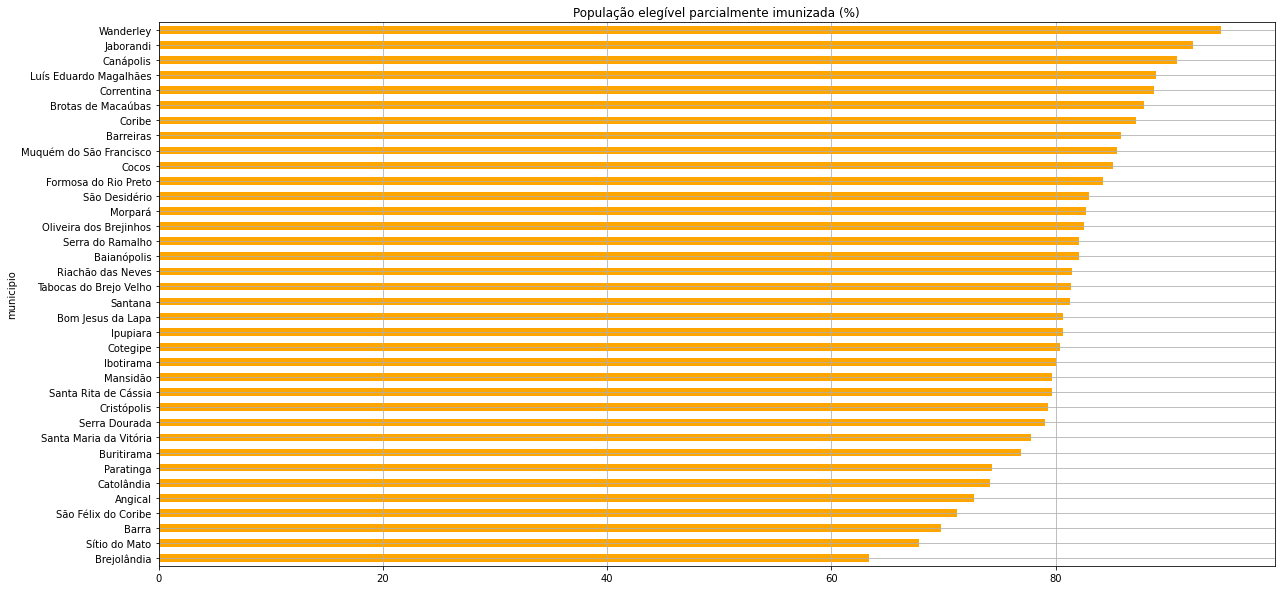

In [ ]:
ranking_dose1 = df_vacina_macro.sort_values(by=['%dose1'], ascending=True)
ranking_dose1.plot.barh(x='municipio', y='%dose1', legend=False, width=0.5, color='orange', figsize=(20, 10), grid=True, title='População elegível parcialmente imunizada (%)')
plt.savefig('/content/drive/MyDrive/GTG-Covid19/Figuras_GTG-Covid19/ranking_parc_imun.png', dpi=400)

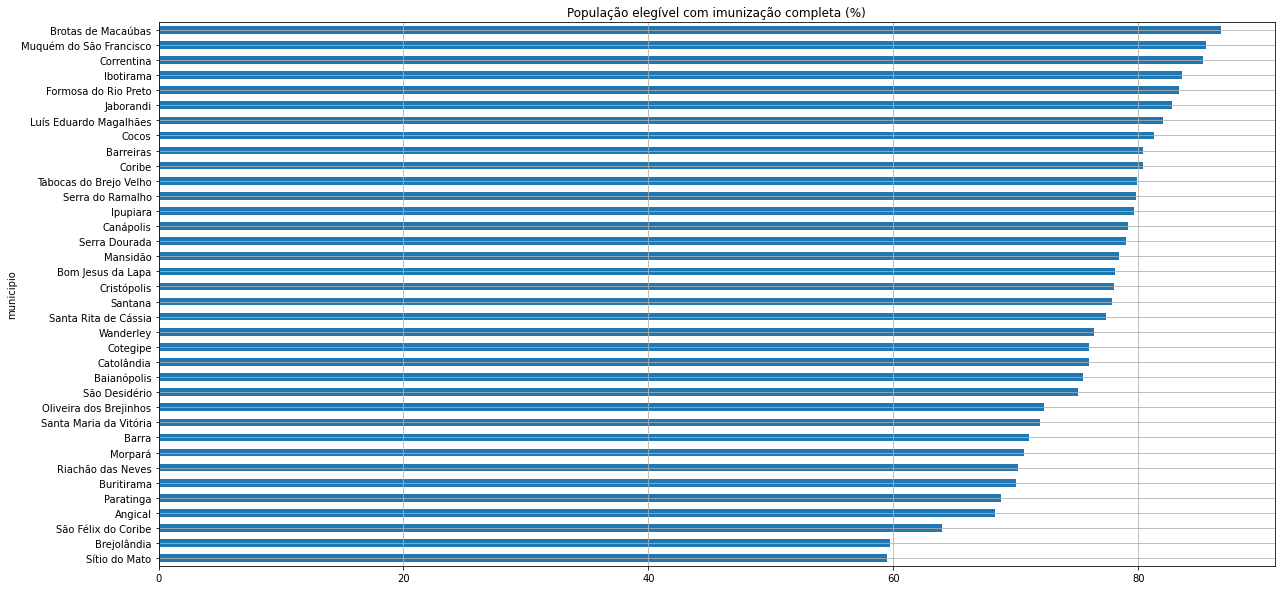

In [ ]:
ranking_dose2 = df_vacina_macro.sort_values(by=['%doseU2'], ascending=True)
ranking_dose2.plot.barh(x='municipio', y='%doseU2', legend=False, width=0.5, figsize=(20, 10), grid=True, title='População elegível com imunização completa (%)')
plt.savefig('/content/drive/MyDrive/GTG-Covid19/Figuras_GTG-Covid19/ranking_tot_imun.png', dpi=400)

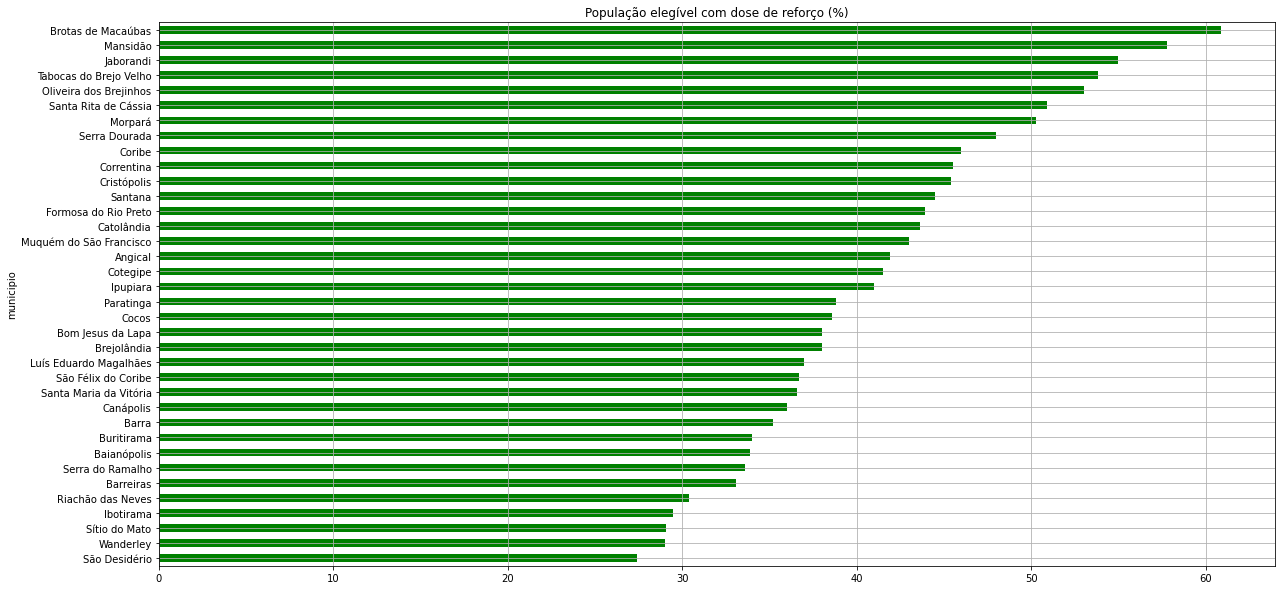

In [ ]:
ranking_dose3 = df_vacina_macro.sort_values(by=['%dose3'], ascending=True)
ranking_dose3.plot.barh(x='municipio', y='%dose3', legend=False, width=0.5, color='green', figsize=(20, 10), grid=True, title='População elegível com dose de reforço (%)')
plt.savefig('/content/drive/MyDrive/GTG-Covid19/Figuras_GTG-Covid19/ranking_reforco_imun.png', dpi=400)

## Grava dados na planilha do Dashboard

In [ ]:
import google.auth
from gspread_pandas import Spread

auth.authenticate_user()
credentials, project_id = google.auth.default()

nome_planilha = 'dados_dashboard_covid19'
spread = Spread(nome_planilha, creds=credentials)
spread.df_to_sheet(df_vacina_macro.sort_values(by=['municipio'], ascending=True), index=False, sheet='vacinas', replace=True)